# About Data 

This dataset provides comprehensive weather data collected from 20 major cities across the USA during the years 2024 and 2025. 🌍 It contains a variety of weather attributes that are crucial for predicting whether it will rain the next day or not. With over 2 years of daily data. 📊

Each row represents a single day's weather conditions, including important features like temperature, humidity, wind speed, cloud cover, atmospheric pressure, and precipitation. The target feature, "Rain Tomorrow," is a binary label (1 = Yes, 0 = No) indicating whether it rained the next day. ☔

data set link : https://www.kaggle.com/datasets/waqi786/usa-rainfall-prediction-dataset-2024-2025


# importing libraries 

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle 
import numpy as np


# loading data set into pandas

In [23]:
rain_data = pd.read_csv("./usa_rain_prediction_dataset_2024_2025.csv")
rain_data.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


## Shows Column names 

In [24]:

rain_data.columns

Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow'],
      dtype='object')

## Shows Shape of data

In [25]:
 
rain_data.shape

(73100, 9)

## Shows Information of columns 


In [26]:

rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


## Checking  for duplicates

In [27]:
 
rain_data.duplicated().sum()

np.int64(0)

## Checking Null Values

In [28]:

rain_data.isnull().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

## Shows basic statistics of data

In [29]:
 
rain_data.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


## shows unique values in location column and there counts

In [30]:

rain_data['Location'].value_counts()

Location
New York           3655
Los Angeles        3655
Chicago            3655
Houston            3655
Phoenix            3655
Philadelphia       3655
San Antonio        3655
San Diego          3655
Dallas             3655
San Jose           3655
Austin             3655
Jacksonville       3655
Fort Worth         3655
Columbus           3655
Indianapolis       3655
Charlotte          3655
San Francisco      3655
Seattle            3655
Denver             3655
Washington D.C.    3655
Name: count, dtype: int64

## value counts of Rain Happened or not using count plot


Rain Tomorrow
0    56988
1    16112
Name: count, dtype: int64


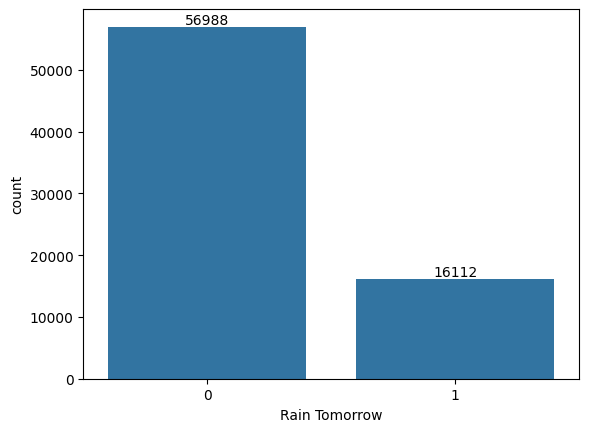

In [31]:
print(rain_data['Rain Tomorrow'].value_counts())

data_label = sns.countplot(x='Rain Tomorrow', data=rain_data)
data_label.bar_label(data_label.containers[0])
plt.show()

## Group by 'Location' and 'Rain Tomorrow' and count occurrences

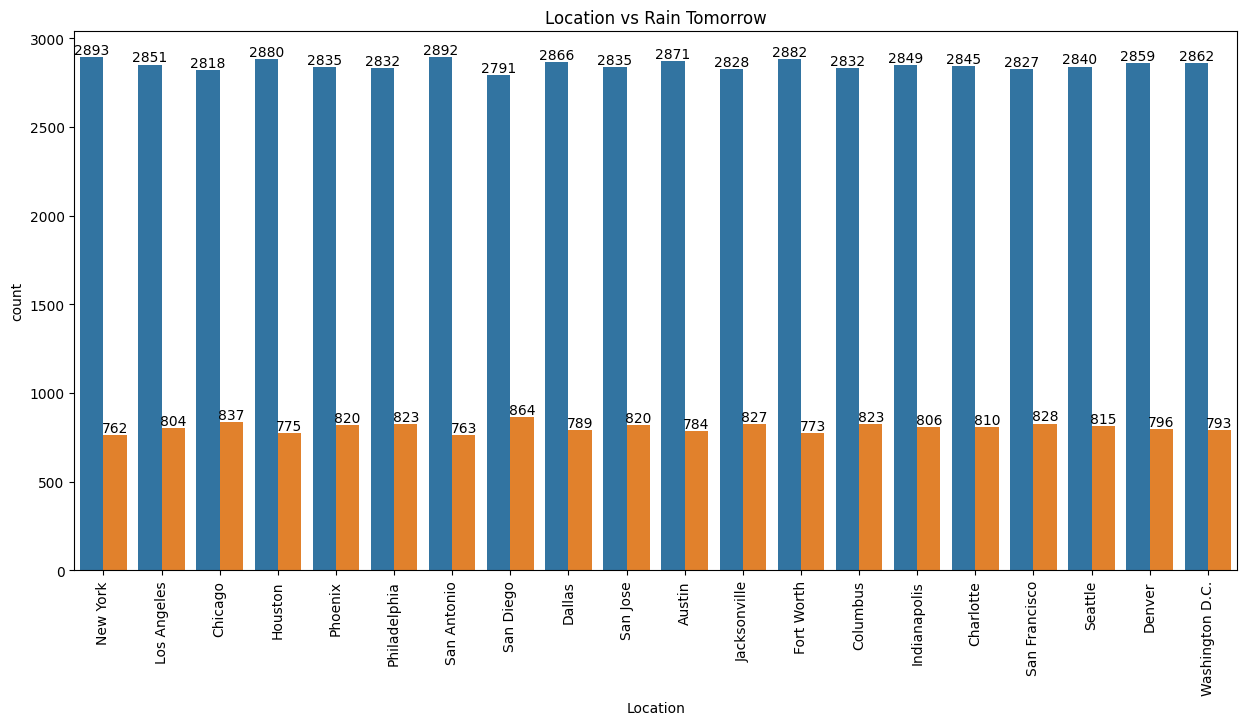

In [32]:

rain_counts = rain_data.groupby(['Location', 'Rain Tomorrow']).size().reset_index(name='Count')

plt.figure(figsize=(15, 7))
data_label = sns.countplot(x='Location', hue='Rain Tomorrow',legend=False, data=rain_data)

for container in data_label.containers:
    data_label.bar_label(container)

plt.title('Location vs Rain Tomorrow')
plt.xticks(rotation=90)
plt.show()

## Pairplot of important features

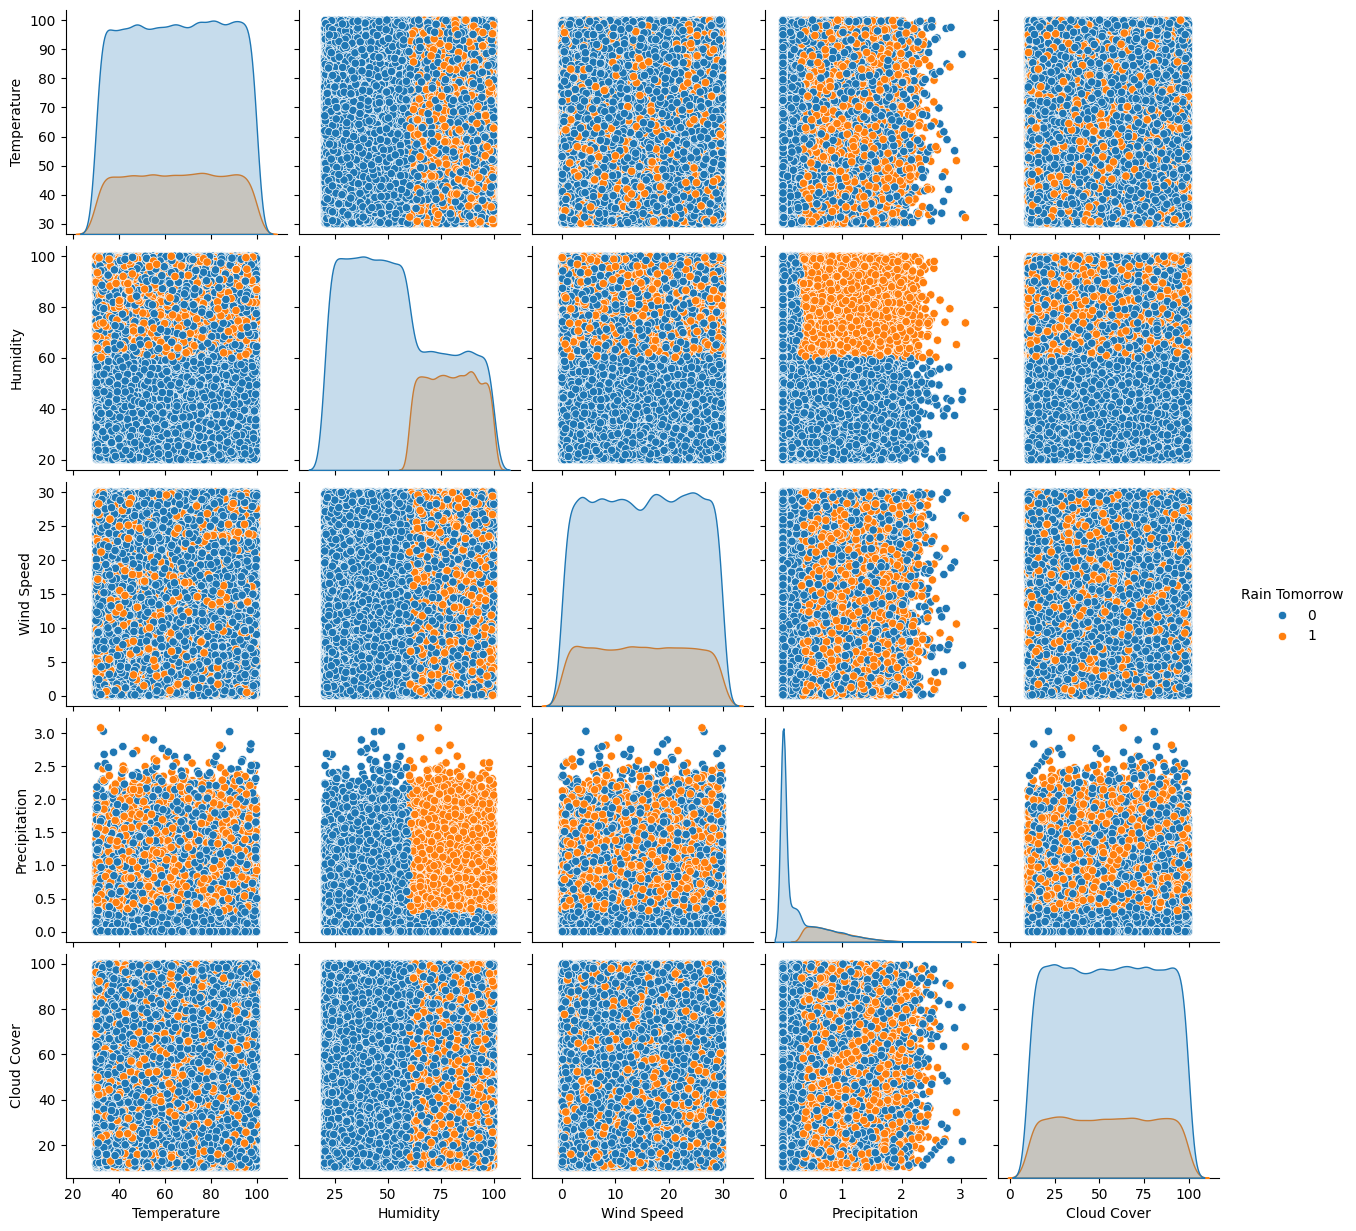

In [33]:

sns.pairplot(rain_data[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Rain Tomorrow']], hue='Rain Tomorrow')
plt.show()


## Label Encoding and Creating a Confusion matrix graph

In [34]:
le = LabelEncoder() # Label encoder for converting categorical variables to integer's

In [35]:
rain_data.columns

Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow'],
      dtype='object')

In [36]:
df1 = rain_data.drop(columns={'Date'}) # Dropping unneccessary data 
df1['Location'] = le.fit_transform(df1['Location']) # Label encoding location column
df1.corr()

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
Location,1.000000,0.004282,0.005198,-0.000940,0.001055,0.002744,0.002618,0.002884
Temperature,0.004282,1.000000,0.003915,0.003431,0.003741,0.000318,0.004250,-0.003593
Humidity,0.005198,0.003915,1.000000,-0.006497,0.000187,-0.002585,-0.001780,0.461646
Wind Speed,-0.000940,0.003431,-0.006497,1.000000,-0.006679,0.004066,0.003659,-0.011715
Precipitation,0.001055,0.003741,0.000187,-0.006679,1.000000,-0.004482,0.000787,0.489804
Cloud Cover,0.002744,0.000318,-0.002585,0.004066,-0.004482,1.000000,-0.004347,-0.003385
Pressure,0.002618,0.004250,-0.001780,0.003659,0.000787,-0.004347,1.000000,-0.002179
Rain Tomorrow,0.002884,-0.003593,0.461646,-0.011715,0.489804,-0.003385,-0.002179,1.000000


<Axes: >

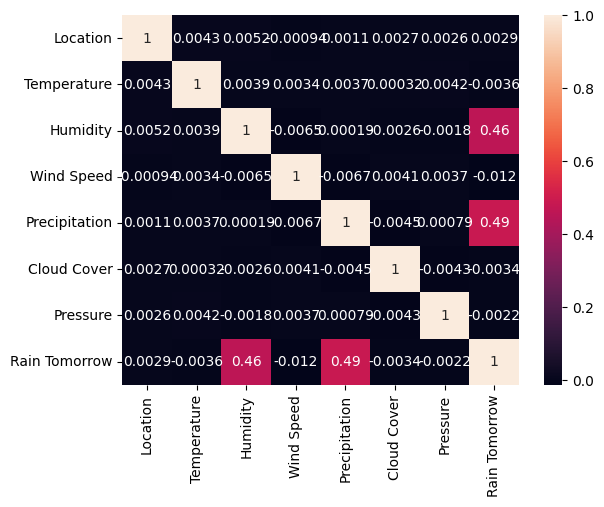

In [37]:
# Checking for correlations in data using heatmap
correlation = df1.corr()
sns.heatmap(correlation, annot=True)

## Creating Feature and target variables 

In [38]:
df1.columns

Index(['Location', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Cloud Cover', 'Pressure', 'Rain Tomorrow'],
      dtype='object')

In [39]:
# dictionary = dict()
# for i,j in zip(rain_data['Location'],df1['Location']):
#     dictionary[i]= j
# print(dictionary)

In [40]:
X = df1.drop(columns={'Rain Tomorrow'}) # Creating X and Y varibales for splitting features and target varibales 
Y = df1['Rain Tomorrow']

In [41]:
X

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
0,11,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278
1,11,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065
2,11,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739
3,11,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163
4,11,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859
...,...,...,...,...,...,...,...
73095,19,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747
73096,19,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675
73097,19,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174
73098,19,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146


In [42]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
73095    0
73096    0
73097    1
73098    1
73099    0
Name: Rain Tomorrow, Length: 73100, dtype: int64

## Spliting data For Training and Testing 

In [43]:
# Creating training and testing data for both feature and target variable 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3, random_state=2)

In [44]:
X_train.shape # Shape of training data 

(51170, 7)

In [45]:
X_test.shape # shape of testing data 

(21930, 7)

## checking which algorithm gives Best performance 

In [46]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix

# creating a dictionary for storing the models 
models = {
    "RandomForest" : RandomForestClassifier(n_estimators = 100, random_state = 42),
    "GradientBoosting" : GradientBoostingClassifier(n_estimators = 100, random_state = 42),
    "KNeighbors" : KNeighborsClassifier(n_neighbors = 5),
    "MultinomialNB" : MultinomialNB()
}


for model_name , model in models.items():
    # fiting the data in the model 
    model.fit(X_train,Y_train)

    # testing the model 
    predictions = model.predict(X_test)

    # checking Accuracy  
    accuracy = accuracy_score(Y_test, predictions)

    # calculating confusion matrix 
    cm = confusion_matrix(Y_test,predictions)

    print(f"{model_name}  Accuarcy : {accuracy}")
    print(f"{model_name}  Confusion matrix ")
    print(np.array2string(cm ,separator=", "),"\n")


RandomForest  Accuarcy : 1.0
RandomForest  Confusion matrix 
[[17024,     0],
 [    0,  4906]] 

GradientBoosting  Accuarcy : 1.0
GradientBoosting  Confusion matrix 
[[17024,     0],
 [    0,  4906]] 

KNeighbors  Accuarcy : 0.7602371181030552
KNeighbors  Confusion matrix 
[[14894,  2130],
 [ 3128,  1778]] 

MultinomialNB  Accuarcy : 0.7498404012767897
MultinomialNB  Confusion matrix 
[[12644,  4380],
 [ 1106,  3800]] 



# Using Random forest classifier algorithm for our model  

In [47]:
from sklearn.ensemble import RandomForestClassifier 
model=  RandomForestClassifier(n_estimators = 100, random_state = 42)

model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

## saving model into Pickle file

In [48]:


import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [49]:
y_pred = model.predict(X_test) # Predicting Testing Data 
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
print(f'Model Accuracy : {model.score(X_test,Y_test)}')

Model Accuracy : 1.0


## plotting Confusion Matrix

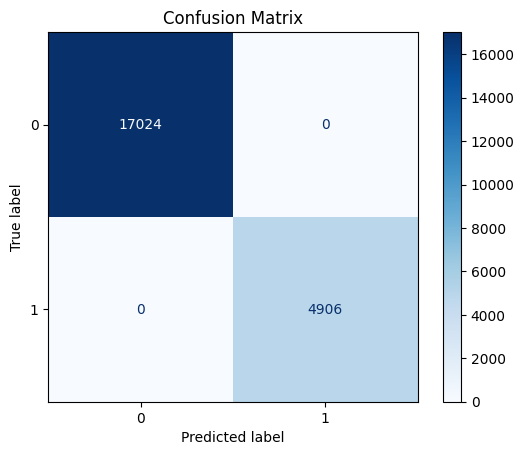

In [51]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## Calculating probabilty 

In [52]:
# 
predected = model.predict_proba([[11,87.54,64.73,14,18,70.56,1026]])[0][1] * 100
predected

/home/majid/Desktop/github/rain-prediction/Rain_pridiction/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


np.float64(98.0)